# Exploring Clustering Techniques with Machine Learning

In contrast to _supervised_ machine learning, _unsupervised_ learning is used when there is no "ground truth" from which to train and validate label predictions. The most common form of unsupervised learning is _clustering_, which is similar conceptually to _classification_, except that the the training data does not include known values for the class label to be predicted. **Clustering works by separating the training cases based on similarities** that can be determined from their feature values. Think of it this way; **the numeric features of a given entity can be thought of as vector coordinates that define the entity's position in n-dimensional space**. What a clustering model seeks to do is to identify groups, or _clusters_, of entities that are close to one another while being separated from other clusters.


## Topics

**Explore unsupervised clustering** using a seeds dataset.

**Visualize high-dimensional data** with Principal Component Analysis (PCA).

**Determine optimal cluster count** using the "elbow" method.

**Implement K-Means and Agglomerative Clustering** to group seed samples.

**Compare clusters** against actual species labels to evaluate performance.


## Load Data

In [4]:
import pandas as pd

# Load the training dataset
data = pd.read_csv('./../../data/seeds.csv')

# Display random sample of 10 observations
features = data.sample(10)
features

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
73,19.11,16.26,0.9081,6.154,3.930,2.936,6.079,1
49,14.86,14.67,0.8676,5.678,3.258,2.129,5.351,0
100,16.41,15.25,0.8866,5.718,3.525,4.217,5.618,1
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
28,14.11,14.18,0.8820,5.541,3.221,2.754,5.038,0
89,20.88,17.05,0.9031,6.450,4.032,5.016,6.321,1
116,18.96,16.20,0.9077,6.051,3.897,4.334,5.750,1
45,13.80,14.04,0.8794,5.376,3.155,1.560,4.961,0
113,19.14,16.61,0.8722,6.259,3.737,6.682,6.053,1
12,13.89,14.02,0.8880,5.439,3.199,3.986,4.738,0


# Reduce Dimensionality with PLC

As you can see, the dataset contains six data points (or _features_) for each instance (_observation_) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot; so we'll take advantage of a mathematical technique called _Principal Component Analysis_ (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates.

In [11]:
# Project 6D data into 2D for visualization

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Normalize the numeric features so that they're on the same scale

scaled_features = MinMaxScaler().fit_transform(features[data.columns[0:6]])
print(scaled_features[0:10])

[[0.79631761 0.79480519 1.         0.77456207 0.90294957 0.26864506]
 [0.30724971 0.38181818 0.         0.41203351 0.26355852 0.11108942]
 [0.48561565 0.53246753 0.4691358  0.4424981  0.51760228 0.51874268]
 [0.         0.         0.26419753 0.         0.         0.40433424]
 [0.22094361 0.25454545 0.35555556 0.30769231 0.22835395 0.23311207]
 [1.         1.         0.87654321 1.         1.         0.67473643]
 [0.77905639 0.77922078 0.99012346 0.69611577 0.8715509  0.54158532]
 [0.18527043 0.21818182 0.29135802 0.18202589 0.16555661 0.        ]
 [0.79976985 0.88571429 0.11358025 0.85453161 0.71931494 1.        ]
 [0.19562716 0.21298701 0.5037037  0.23000762 0.2074215  0.47364311]]


In [12]:
# Get the two principle components
pca = PCA(n_components=2).fit(scaled_features)
features_2d = pca.transform(scaled_features)

features_2d[0:10]

array([[ 0.73411958,  0.41489795],
       [-0.50996429, -0.18907403],
       [ 0.02717431, -0.06135086],
       [-0.97277773, -0.01623214],
       [-0.52339073,  0.06547864],
       [ 1.11950563,  0.01748559],
       [ 0.73131124,  0.26971911],
       [-0.71661218,  0.16696646],
       [ 0.60253649, -0.73696996],
       [-0.49190233,  0.06907924]])

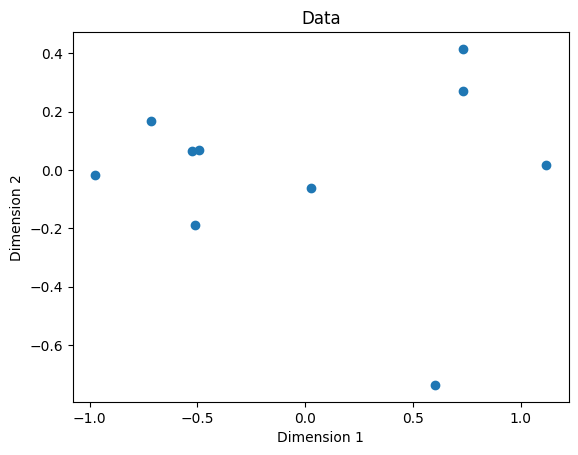

In [16]:
# Visualize features 2d
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(features_2d[:, 0], features_2d[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()